# REAL ESTATE PRICE PREDICTOR - ML


In [1]:
'''The data housing.data and housing.names have 13 features and 1 label (or predictor variable). The data has been saved 
in an excel file named - housing.data on the desktop.'''

'The data housing.data and housing.names have 13 features and 1 label (or predictor variable). The data has been saved \nin an excel file named - housing.data on the desktop.'

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("data.csv")

## ANALYSING / READING THE DATA FROM THE FILE

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.281238,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.699956,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

## Training and Testing Data Splitting

# Now we will use the inbuilt scikit-learn library to do the above -but with fewer lines of codes. 

In [9]:
from sklearn .model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2, random_state= 42)

the issue here - what if "CHAS" feature in Training set has recieved all the 0's and the no 1's. then the trained data is trained without 1's because we need train set to have all the possible values from the entire data set.
This kind of specific shuffling can be achieved by - Stratified Shuffling Split

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [12]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [13]:
housing = strat_train_set.copy()

In [14]:
housing['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

## FINDING CORRELATION

In [15]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.675382
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

Correlation above - it shows the correlation between MDEV(price of real estate - predictor) with each of the feature.

MEDV = 1 means a strong positive correlation. What you see above is the correlation in all the features from the given values in it's data set. The value of correlation will always lie between -1 to 1. 

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='DIS', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='DIS', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='DIS'>,
        <AxesSubplot:xlabel='RM', ylabel='DIS'>,
        <AxesSubplot:xlabel='DIS', ylabel='DIS'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='DIS'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='DIS', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

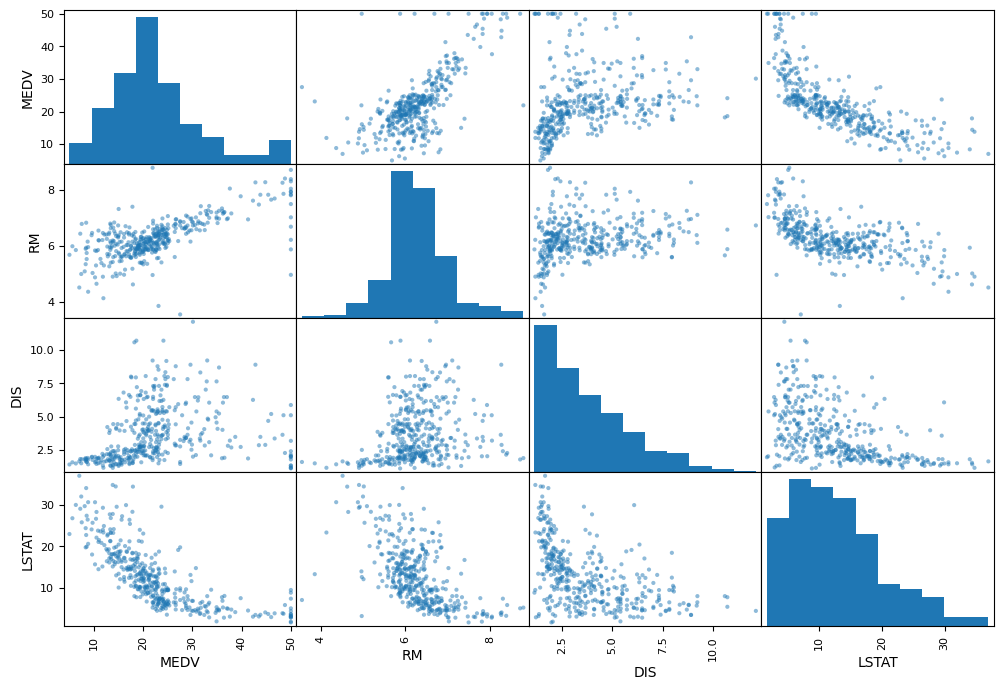

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM", "DIS", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

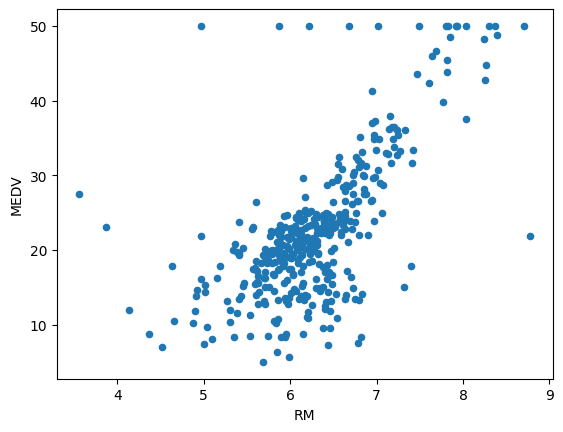

In [17]:
housing.plot(kind="scatter", x="RM", y ="MEDV")

one of the benefits of drawing scatter plot for well correlating features is that, it helps us identify Outliers.

In [18]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.675382
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.521603
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

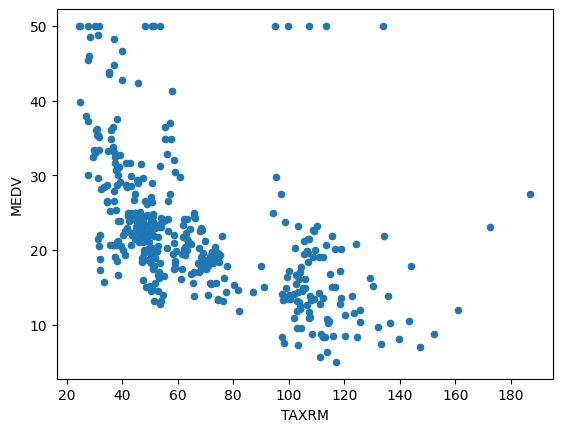

In [20]:
housing.plot(kind="scatter", x="TAXRM", y ="MEDV")

In [21]:
housing = strat_train_set.drop("MEDV",axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## MISSING ATTRIBUTES

Some of the RM datas are deleted before running this segment. To take care of missing attribute: 
a) Get rid of missing attributes
b) get rid of whole attribute
c) set some sensible values - ideally (0, mean or median)

a = housing.dropna(subset=['RM'])
a.shape

b = housing.drop("RM", axis = 1)

In [22]:
#Option c
median = housing["RM"].median()
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [23]:
housing.describe() #before we started imputing for the missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.274032,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.708370,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [24]:
'''Instead of doing the above for option - c, we simply use the inbuilt library of sklearn - imputer'''
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")
imputer.fit(housing)
imputer.statistics_
X = imputer.transform(housing)

In [25]:
housing_tr = pd.DataFrame(X, columns = housing.columns)
housing_tr.describe() #Transformed Data Set of Housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.27355,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.70575,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.56100,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.87875,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.20900,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.62925,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# SCIKIT- LEARN DESIGNING

Before this al we did was - we understood the features and the data.
Primarily, three types of objects -
1. Estimators - estimates some parameters, based on imputer. eg. Imputer, it has fit method and transform method
1.1 Fit Method - fits the data set and computes the internal parameters.

2. Transformers - transforms method takes input and returns output based on the learnings from fit(). It also has c convinience funtion called fit_transform(), which fits and then transforms. 
3. Predictors - eg. Linear Regression Model, fit() and predict() are common functions. It also gives some score function which will evaluate the predictions. 

# Feature Scalling

Two types of feature scaling methods - 
1. Min-Max Method (Normalization): (value-min)/(max-min) | this makes all the values to scale down from 0 to 1, but this method can get affected if there is a data error or too many outliers.
calling function: MinMaxScaler from sklearn

2. Standardization: (value - mean)/std | sklearn class called - StandardScaler, the changes in the values don't differ much in this method. 

# Creating Pipeline
pipelines are a structures of ML code which can help us to edit the code at a later stage with ease. It basically automates the entire model - without having to enter the data everytime when we want to do the analysis and predict. 

In [26]:
from sklearn.pipeline import Pipeline
#let's scale the features for a maintained continuity amongst the dataset which is under analysis for ease of study.
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    #........add as many as you want in your pipeline
    ('std_scaler', StandardScaler())
])

In [27]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr #this is a numpy array
housing_num_tr.shape

(404, 13)

# Selecting a desired ML Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [29]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.294, 25.572, 16.549, 23.411, 23.393])

In [30]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

# Evaluating the Model

In [31]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = mse**(0.5)

In [32]:
rmse

1.204257611991556

1. From above looking at the "Mean Squared Error" coming out to be '0'. We realise that our data is overfit in the model Decision Tree.
2. The MSE was equal to 4.589 in Linear Regression
3. Overfitting - it simply means that the model has also accomodated the noise and outliers in the data. A GOOD fit model does not learn the noice and the outliers but importantly UNDERSTANDS the trend in the data.


# Using Cross-Validation: Better Technique

Cross-Validation: it is not a model, but it is a technique to better the fitting in the model itself, so it is used after the model has been defined.

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring= "neg_mean_squared_error", cv = 10)
rmse_scores = (-scores)**(0.5)

In [34]:
def print_scores(scores):
    print("Scores are: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviatioin: ", scores.std())

In [35]:
print_scores(rmse_scores)

Scores are:  [2.85720354 2.80861672 4.6190462  2.63759119 3.19946619 2.89541522
 4.49638183 3.26220314 2.89706249 3.25404998]
Mean:  3.292703648552764
Standard Deviatioin:  0.6623206325544412


# Saving the Model

In [36]:
from joblib import dump, load
dump(model, 'MLProject.joblib')

['MLProject.joblib']

# Testing the model on - Real Estate Predictor Test Data

In [37]:
x_test = strat_test_set.drop("MEDV", axis = 1 )
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
test_mse = mean_squared_error(y_test, final_predictions)
test_rmse = (test_mse)**(0.5)
test_rmse

3.0444882647363976

In [38]:
print("Finally Predicted Values:", final_predictions)

Finally Predicted Values: [24.714 11.251 25.535 21.559 18.852 14.797 20.275 14.925 31.948 41.714
 19.753 11.467 24.674 22.354 19.397 11.414 31.48  14.519 23.79  18.745
 19.696 17.536 15.454 21.753 18.603 31.494 16.473 33.42   9.167 33.732
 24.475 21.164 23.065 10.64  20.961 11.354 42.28  24.616 24.146 41.681
 24.199 29.258 20.026 21.085 18.389 32.897 44.363 20.345 20.117 22.443
 21.304 14.241 20.966 15.647 24.771 32.485 39.77  30.428 19.286 20.861
 46.632 10.001 18.676 25.261 15.503 33.372 19.366 18.274 19.041 34.635
 27.248 22.86  21.562 22.83  34.918 12.912 15.81  19.856 20.877 22.903
 22.882 21.303 14.056 23.251 20.53  21.124 14.477 21.285 22.148 23.159
 18.403 26.741  7.241 26.109 18.427 29.346 19.916 30.619 15.075 27.45
 20.935 20.631]


In [39]:
print("Actual Values: ", list(y_test))

Actual Values:  [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]
